In [14]:
ctemps = [5, 10, 12, 14, 10, 23, 41, 30, 12, 24, 12, 18, 29]

ftemps1 = [(t * 9/5) + 32 for t in ctemps]
ftemps2 = {(t * 9/5) + 32 for t in ctemps}
print("\n", ftemps1, type(ftemps1))
print("\n", ftemps2, type(ftemps2))


evens = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

list_evenSquared = [e ** 2 for e in evens]
print("\nList comprehension", list_evenSquared)

set_evenSquared = {e ** 2 for e in evens}
print("\nSet comprehension", set_evenSquared)


 [41.0, 50.0, 53.6, 57.2, 50.0, 73.4, 105.8, 86.0, 53.6, 75.2, 53.6, 64.4, 84.2] <class 'list'>

 {64.4, 73.4, 41.0, 105.8, 75.2, 50.0, 84.2, 53.6, 86.0, 57.2} <class 'set'>

List comprehension [4, 16, 36, 64, 100, 144, 196, 256, 324, 400]

Set comprehension {64, 256, 100, 4, 36, 196, 324, 16, 144, 400}


In [15]:
import numpy as np

a = np.array([[1, 2],
              [3, 4]])

b = np.array([[5, 6],
              [7, 8]])

print("Vertical stacking:", np.vstack((a, b)))

# horizontal stacking
print("Horizontal stacking:", np.hstack((a, b)))


c = [5, 6]
# stacking columns
print("Column stacking:", np.column_stack((a, c)))


Vertical stacking: [[1 2]
 [3 4]
 [5 6]
 [7 8]]
Horizontal stacking: [[1 2 5 6]
 [3 4 7 8]]
Column stacking: [[1 2 5]
 [3 4 6]]


In [16]:
import pandas as pd
import numpy as np
s = pd.Series([0, 1, 4, 9, 16, 25], name='squares')
print(s)
print(s.index)
print(s.values, list(s.index))
print(s[2:4])

0     0
1     1
2     4
3     9
4    16
5    25
Name: squares, dtype: int64
RangeIndex(start=0, stop=6, step=1)
[ 0  1  4  9 16 25] [0, 1, 2, 3, 4, 5]
2    4
3    9
Name: squares, dtype: int64


In [17]:
import pandas as pd
pop2014 = pd.Series([100, 99.3, 95.5, 93.5, 92.4, 84.8, 84.5, 78.9, 74.3, 72.8],
                    index=['Java', 'C', 'C++', 'Python', 'C#', 'PHP', 'JavaScript', 'Ruby', 'R', 'Matlab'])

pop2015 = pd.Series({'C': 50.0, 'C++': 99.4, 'Python': 96.5, 'C#': 91.3,
                     'R': 84.8, 'PHP': 84.5, 'JavaScript': 83.0, 'Ruby': 76.2, 'Matlab': 72.4})

print(pop2014)

print(pop2015) # index sort

Java          100.0
C              99.3
C++            95.5
Python         93.5
C#             92.4
PHP            84.8
JavaScript     84.5
Ruby           78.9
R              74.3
Matlab         72.8
dtype: float64
C             50.0
C++           99.4
Python        96.5
C#            91.3
R             84.8
PHP           84.5
JavaScript    83.0
Ruby          76.2
Matlab        72.4
dtype: float64


In [18]:
print(pop2014.index)
print(pop2014.iloc[5:10])

print(pop2014.loc[:'Ruby'])

Index(['Java', 'C', 'C++', 'Python', 'C#', 'PHP', 'JavaScript', 'Ruby', 'R',
       'Matlab'],
      dtype='object')
PHP           84.8
JavaScript    84.5
Ruby          78.9
R             74.3
Matlab        72.8
dtype: float64
Java          100.0
C              99.3
C++            95.5
Python         93.5
C#             92.4
PHP            84.8
JavaScript     84.5
Ruby           78.9
dtype: float64


loc gets rows (or columns) with particular labels from the index.

iloc gets rows (or columns) at particular positions in the index (so it only takes integers).

ix usually tries to behave like loc but falls back to behaving like iloc if a label is not present in the index

In [19]:
twoyears = pd.DataFrame({'2014': pop2014, '2015': pop2015})
print(twoyears)

             2014  2015
C            99.3  50.0
C#           92.4  91.3
C++          95.5  99.4
Java        100.0   NaN
JavaScript   84.5  83.0
Matlab       72.8  72.4
PHP          84.8  84.5
Python       93.5  96.5
R            74.3  84.8
Ruby         78.9  76.2


In [20]:
twoyears['Average'] = 0.5*(twoyears['2014'] + twoyears['2015']) 
print(twoyears)

             2014  2015  Average
C            99.3  50.0    74.65
C#           92.4  91.3    91.85
C++          95.5  99.4    97.45
Java        100.0   NaN      NaN
JavaScript   84.5  83.0    83.75
Matlab       72.8  72.4    72.60
PHP          84.8  84.5    84.65
Python       93.5  96.5    95.00
R            74.3  84.8    79.55
Ruby         78.9  76.2    77.55


In [21]:
test_data = pd.DataFrame(np.random.choice(['a', 'b', 'c', 'e'], (3, 3)), index=[1, 2, 3], columns=['AA', 'BB', 'CC'])
print(test_data)

  AA BB CC
1  a  b  b
2  e  b  c
3  a  a  a


# pandas aggregation

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
main_directory = '/content/drive/MyDrive/AUST Teaching/Fall 2021/Pattern Lab/tips.csv'

In [24]:
open(main_directory,'r').readlines()[:10]

['total_bill,tip,sex,smoker,day,time,size\n',
 '16.99,1.01,Female,No,Sun,Dinner,2\n',
 '10.34,1.66,Male,No,Sun,Dinner,3\n',
 '21.01,3.5,Male,No,Sun,Dinner,3\n',
 '23.68,3.31,Male,No,Sun,Dinner,2\n',
 '24.59,3.61,Female,No,Sun,Dinner,4\n',
 '25.29,4.71,Male,No,Sun,Dinner,4\n',
 '8.77,2.0,Male,No,Sun,Dinner,2\n',
 '26.88,3.12,Male,No,Sun,Dinner,4\n',
 '15.04,1.96,Male,No,Sun,Dinner,2\n']

In [25]:
import pandas as pd
tips = pd.read_csv(main_directory)

In [26]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [27]:
tips.shape

(244, 7)

In [28]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [29]:
tips.max()

total_bill    50.81
tip            10.0
sex            Male
smoker          Yes
day            Thur
time          Lunch
size              6
dtype: object

In [30]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [31]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [32]:
tips.shape # row count

(244, 7)

In [33]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [34]:
tips.groupby('sex').max()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Female,44.30,6.5,Yes,Thur,Lunch,6
Male,50.81,10.0,Yes,Thur,Lunch,6


In [35]:
tips.groupby(['sex','smoker']).mean()

total_bill       tip      size
sex    smoker                                
Female No       18.105185  2.773519  2.592593
       Yes      17.977879  2.931515  2.242424
Male   No       19.791237  3.113402  2.711340
       Yes      22.284500  3.051167  2.500000

In [37]:
import pandas as pd
pd.pivot_table(tips,'total_bill','sex','smoker','max' )

# pd.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', 
#         fill_value=None, margins=False, dropna=True, margins_name='All')

# Create a spreadsheet-style pivot table as a DataFrame.

smoker,No,Yes
sex,,
Female,35.83,44.30
Male,48.33,50.81


In [38]:
pd.pivot_table(tips,'total_bill',['sex','smoker'],['day','time'],'max')
# pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean')


day              Fri           Sat    Sun   Thur       
time          Dinner  Lunch Dinner Dinner Dinner  Lunch
sex    smoker                                          
Female No      22.75  15.98  35.83  35.26  18.78  34.83
       Yes     16.32  16.27  44.30  20.90    NaN  43.11
Male   No      22.49    NaN  48.33  48.17    NaN  41.19
       Yes     40.17  13.42  50.81  45.35    NaN  32.68

# Data Frame Creation and visualization 

In [39]:
import pandas as pd
from matplotlib import pyplot as plt
url='http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header = None)

df[0:50]

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [40]:
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','flower_type']
df['flower_type'] = df['flower_type'].astype('category')
df.flower_type = df.flower_type.cat.rename_categories([0,1,2])

df.head(20)

,sepal_length,sepal_width,petal_length,petal_width,flower_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


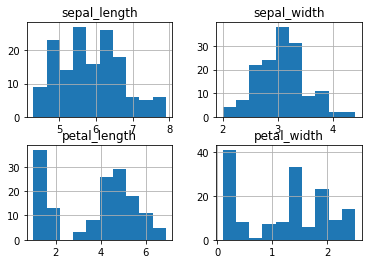

In [ ]:
df.hist()
plt.show()

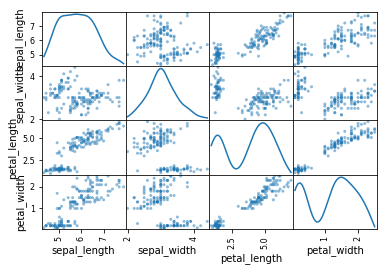

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, diagonal='kde')
plt.show()

‘bar’ or ‘barh’ for bar plots
‘hist’ for histogram
‘box’ for boxplot
‘kde’ or ‘density’ for density plots
‘area’ for area plots
‘scatter’ for scatter plots
‘hexbin’ for hexagonal bin plots
‘pie’ for pie plots
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-kde



More general:
http://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


# More Operations on the Data Frame

In [ ]:
df = df.sort_values(by='sepal_width')
df.head(1500)

,sepal_length,sepal_width,petal_length,petal_width,flower_type
60,5.0,2.0,3.5,1.0,1
62,6.0,2.2,4.0,1.0,1
119,6.0,2.2,5.0,1.5,2
68,6.2,2.2,4.5,1.5,1
41,4.5,2.3,1.3,0.3,0
...,...,...,...,...,...
16,5.4,3.9,1.3,0.4,0
14,5.8,4.0,1.2,0.2,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0


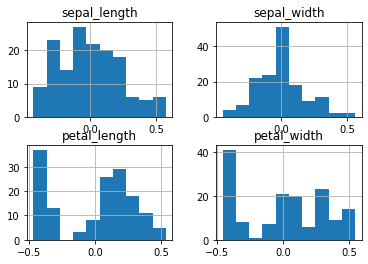

In [ ]:
# Normalizing your data set
df=df.iloc[:,0:4].apply( lambda f: ( f - f.mean() )/( f.max() - f.min() ) )
df.hist()
plt.show()

In [ ]:
# Get a random sample from the data set
df=df.sample(frac=1.0)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
7,-0.234259,0.144167,-0.382825,-0.416111
85,0.043519,0.144167,0.125650,0.167222
86,0.237963,0.019167,0.159548,0.125556
62,0.043519,-0.355833,0.040904,-0.082778
14,-0.012037,0.394167,-0.433672,-0.416111


In [41]:
# Split the data set into test and train set
train=df.sample(frac=0.7,random_state=123)
test=df.drop(train.index)

# Read/Write

In [ ]:
df.to_csv('iris_normalized.csv')
new_df = pd.read_csv('iris_normalized.csv')
new_df.head()

,Unnamed: 0,0,1,2,3,4
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


# Deal with missing data 

In [ ]:
import numpy as np
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                    [3, 4, np.nan, 1],
                    [np.nan, np.nan, np.nan, 5],
                    [np.nan, 3, np.nan, 4]],
                    columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [ ]:
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna

In [ ]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                    "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                    "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                             pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In computer programming, a sentinel value (also referred to as a flag value, trip value, rogue value, signal value, or dummy data) is a special value in the context of an algorithm which uses its presence as a condition of termination, typically in a loop or recursive algorithm.

floating-point NaN

In [ ]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna

# Features extraction

# Text Features

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

sample = ['sample of evil', 'evil queen', 'horizon problem']
vec = CountVectorizer()
X = vec.fit_transform(sample)
# print(X.toarray())
feature_extraction = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(feature_extraction)

   evil  horizon  of  problem  queen  sample
0     1        0   1        0      0       1
1     1        0   0        0      1       0
2     0        1   0        1      0       0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(sample)
feature_extraction = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(feature_extraction)

       evil   horizon        of   problem     queen    sample
0  0.473630  0.000000  0.622766  0.000000  0.000000  0.622766
1  0.605349  0.000000  0.000000  0.000000  0.795961  0.000000
2  0.000000  0.707107  0.000000  0.707107  0.000000  0.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Derived Features

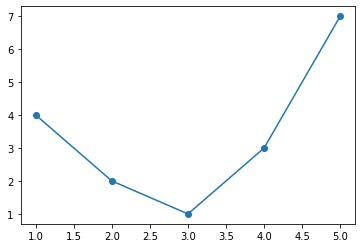

In [43]:
%matplotlib inline 
# For jupyter notebook only
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y)
plt.plot(x,y)
plt.show()

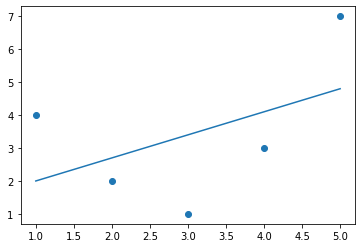

In [ ]:
from sklearn.linear_model import LinearRegression
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x,y)
plt.plot(x, yfit)
plt.show()

X
 [[1]
 [2]
 [3]
 [4]
 [5]]

X2
 [[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


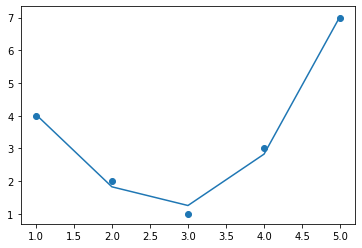

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
X = x[:, np.newaxis]
print("X\n", X)
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
# https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models
print("\nX2\n", X2)


model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x,y)
plt.plot(x, yfit)
plt.show()


#     degree : integer
#     The degree of the polynomial features

#     include_bias : boolean
#     If True (default), then include a bias column,
#     the feature in which all polynomial powers are zero
#     (i.e. a column of ones - acts as an intercept term in a linear model).


#     rows = np.array([0, 3], dtype=np.intp)
#     columns = np.array([0, 2], dtype=np.intp)
#     rows[:, np.newaxis]
#     array([[0],
#        [3]])

#     # intp	Integer used for indexing (same as C ssize_t; normally either int32 or int64



# Scipy

• A collection of mathematical algorithms

• Gives Python similar capabilities as Matlab

• Many submodules are used for different domains

• We will see examples from linalg and optimize submodules

• For details: http://docs.scipy.org/doc/scipy/reference/tutorial/index.html

linalg: Linear Algebra submodule

Linear algebra submodule provides several routines for matrix computations.
For example to find the inverse of matrix A

In [ ]:
from scipy import linalg as la
import numpy as np
A = np.array([[5,3,5],[2,2,0], [1,3,1]])
iA = la.inv(A)
print(iA)

[[ 0.08333333  0.5        -0.41666667]
 [-0.08333333  0.          0.41666667]
 [ 0.16666667 -0.5         0.16666667]]


# Solving linear systems of equations
Ax=b

In [ ]:
A = np.array([[5,3,5], [2,2,0], [1,3,1]])
b = np.array([ 2, 5, 1])
x = la.solve(A,b)
print('Solution:', x)
x = la.inv(A).dot(b) # same result
print(x)

Solution: [ 2.25  0.25 -2.  ]
[ 2.25  0.25 -2.  ]


# More Will Come...

# http://book.pythontips.com/en/latest/map_filter.html
    
map filter reduce